0.19943423326384715 0.2
0.2638545462044187 0.25
0.05761111111111111 0.054799291699557995


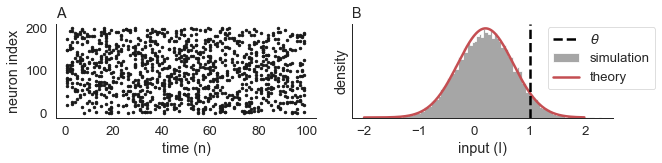

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')


###############################################
###############################################


T=100
N=200
theta=1
sigmax=.5
mux=.2
muW=0
sigmaW=.5/np.sqrt(N)


Ix=mux+sigmax*np.random.randn(N,T)
I=np.zeros((N,T))
S=np.zeros((N,T))

W=muW+sigmaW*np.random.randn(N,N)

#S[:,0]=np.random.binomial(1,.5,N)
for n in range(T-1):
    I[:,n]=W@S[:,n]+Ix[:,n]
    S[:,n+1]=np.heaviside(I[:,n]-theta,0)
I[:,n+1]=W@S[:,n+1]+Ix[:,n+1]

BurnIn=10

r=S[:,BurnIn:].mean()
muI=N*muW*r+mux
sigmaI=np.sqrt(N*(muW**2)*r*(1-r)+sigmax**2)


print(I[:,BurnIn:].mean(),muI)  

print(I[:,BurnIn:].var(),sigmaI**2)


# rvec=np.mean(S[:,BurnIn:],axis=1)
# muIvec=W@rvec+mux
# sigmaIvec=np.sqrt((W*W)*rvec*(1-rvec)+sigmax**2)
# print('vec',muIvec.mean(),(sigmaIvec**2).mean())


from scipy.stats import norm
rTh=1-norm.cdf(theta,loc=muI,scale=sigmaI)

print(r,rTh)

Inds=np.nonzero(S)
#print(Inds[0].shape,Inds[1].shape)

plt.subplots(figsize=(9.5,2.5))

plt.subplot(1,2,1)
plt.plot(Inds[1],Inds[0],'k.')
plt.xlabel('time (n)')
plt.ylabel('neuron index')
plt.title('A',loc='left')
sns.despine()



plt.subplot(1,2,2)
plt.hist(I.flatten(),100,histtype='stepfilled',density=True,label='simulation',color=[.65,.65,.65])
Iplot=np.arange(-2,2,.01)
plt.plot(Iplot,norm.pdf(Iplot,loc=muI,scale=sigmaI),'r',label='theory')
plt.axvline(x=theta,color=[0,0,0],linestyle='--',label=r'$\theta$')
plt.xlabel('input (I)')
plt.ylabel('density')
plt.yticks([])
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=[.75,.3])
#plt.legend(loc=[.05,.6])
plt.title('B',loc='left')
sns.despine()

plt.tight_layout()

